<h1><font size=12>
Weather Derivatites </h1>
<h1> Vgam Model - Parameters Estimation <br></h1>

Developed by [Jesus Solano](mailto:ja.solano588@uniandes.edu.co) <br>  
5 October 2018 


In [1]:
# Load fulldataset 

allData <- read.csv(file='../datasets/fullDataset/completeDailyDataset.csv', header=TRUE, sep=",", row.names = 'X' ) 
myData <- read.csv(file='../datasets/fullDataset/completeDailyDataset.csv', header=TRUE, sep=",") 

In [2]:
# Show a preview of dataset.
head(myData)

X,Prep,Month,nino34,probNeutral,probNino,probNina,state,nextState
2005-01-01,0.0,1,0.6061863,0.15,0.85,0,0,0
2005-01-02,0.0,1,0.5993582,0.15,0.85,0,0,0
2005-01-03,0.0,1,0.6467837,0.15,0.85,0,0,1
2005-01-04,1.6,1,0.6636958,0.15,0.85,0,1,0
2005-01-05,0.0,1,0.7113302,0.15,0.85,0,0,0
2005-01-06,0.0,1,0.6791847,0.15,0.85,0,0,0


In [3]:
# Split dataset into dry and wet days.

allData$nextState=as.factor(allData$nextState)
allData$state=as.factor(allData$state)
allData$Month=as.factor(allData$Month)


dryDays <- allData[allData$state == 0,]
wetDays <- allData[allData$state == 1,]

summary(allData)


      Prep            Month          nino34          probNeutral    
 Min.   : 0.000   1      : 341   Min.   :-2.02452   Min.   :0.0000  
 1st Qu.: 0.000   3      : 341   1st Qu.:-0.57617   1st Qu.:0.1400  
 Median : 0.200   5      : 341   Median :-0.01589   Median :0.4400  
 Mean   : 2.781   7      : 341   Mean   : 0.04185   Mean   :0.4604  
 3rd Qu.: 2.700   8      : 341   3rd Qu.: 0.55833   3rd Qu.:0.7500  
 Max.   :78.500   10     : 341   Max.   : 3.28767   Max.   :1.0000  
                  (Other):1970                                      
    probNino         probNina      state    nextState
 Min.   :0.0000   Min.   :0.0000   0:1741   0:1741   
 1st Qu.:0.0100   1st Qu.:0.0000   1:2275   1:2275   
 Median :0.0500   Median :0.0500                     
 Mean   :0.2895   Mean   :0.2504                     
 3rd Qu.:0.5900   3rd Qu.:0.5000                     
 Max.   :1.0000   Max.   :0.9900                     
                                                     

In [4]:
# Apply vgam model for transitions. 
library(VGAM)

# La siguiente es la ideal pero por correlaciones no fucniona.
# vglm(nextState ~ Prep + Month +nino34 + probNeutral + probNino, data=dryDays ,family = binomialff())



Loading required package: stats4
Loading required package: splines


In [5]:
# Fit to dryDays (Transitions)
fitDry = glm(nextState ~ Month  + probNino + probNina , data=dryDays ,family = binomial)
fitDry


Call:  glm(formula = nextState ~ Month + probNino + probNina, family = binomial, 
    data = dryDays)

Coefficients:
(Intercept)       Month2       Month3       Month4       Month5       Month6  
    -1.1680       0.3467       0.8489       1.5632       1.5676       1.1326  
     Month7       Month8       Month9      Month10      Month11      Month12  
     1.3112       1.4329       0.9249       1.5877       1.3566       0.5185  
   probNino     probNina  
    -0.4535       0.1769  

Degrees of Freedom: 1740 Total (i.e. Null);  1727 Residual
Null Deviance:	    2369 
Residual Deviance: 2249 	AIC: 2277

In [6]:
summary(fitDry)


Call:
glm(formula = nextState ~ Month + probNino + probNina, family = binomial, 
    data = dryDays)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4380  -1.0648  -0.7571   1.1648   1.8921  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.1680     0.1891  -6.175 6.61e-10 ***
Month2        0.3467     0.2302   1.506 0.131997    
Month3        0.8489     0.2299   3.692 0.000223 ***
Month4        1.5632     0.2685   5.821 5.85e-09 ***
Month5        1.5676     0.2592   6.049 1.46e-09 ***
Month6        1.1326     0.2437   4.648 3.36e-06 ***
Month7        1.3112     0.2351   5.577 2.45e-08 ***
Month8        1.4329     0.2334   6.139 8.33e-10 ***
Month9        0.9249     0.2245   4.121 3.77e-05 ***
Month10       1.5877     0.2465   6.440 1.19e-10 ***
Month11       1.3566     0.2448   5.542 2.99e-08 ***
Month12       0.5185     0.2244   2.310 0.020862 *  
probNino     -0.4535     0.1686  -2.691 0.007133 ** 
probNina      0.1769     0.

In [7]:
# Fit to wetDays (Transitions)
fitWet = glm(nextState ~ Month + Prep+probNino+probNina, data=wetDays ,family = binomial)
fitWet


Call:  glm(formula = nextState ~ Month + Prep + probNino + probNina, 
    family = binomial, data = wetDays)

Coefficients:
(Intercept)       Month2       Month3       Month4       Month5       Month6  
   -0.56317      0.58388      0.83200      1.46846      1.30417      1.10322  
     Month7       Month8       Month9      Month10      Month11      Month12  
    0.88102      0.67001      0.48877      0.89717      0.93912      0.31088  
       Prep     probNino     probNina  
    0.03326      0.30711      0.89078  

Degrees of Freedom: 2274 Total (i.e. Null);  2260 Residual
Null Deviance:	    2858 
Residual Deviance: 2754 	AIC: 2784

In [8]:
summary(fitWet)


Call:
glm(formula = nextState ~ Month + Prep + probNino + probNina, 
    family = binomial, data = wetDays)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4640  -1.3169   0.7459   0.9045   1.4012  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.563174   0.228420  -2.466 0.013681 *  
Month2       0.583879   0.267843   2.180 0.029262 *  
Month3       0.832002   0.256657   3.242 0.001188 ** 
Month4       1.468464   0.260971   5.627 1.83e-08 ***
Month5       1.304174   0.256437   5.086 3.66e-07 ***
Month6       1.103216   0.256153   4.307 1.66e-05 ***
Month7       0.881016   0.252816   3.485 0.000492 ***
Month8       0.670010   0.250244   2.677 0.007419 ** 
Month9       0.488770   0.259206   1.886 0.059343 .  
Month10      0.897170   0.250806   3.577 0.000347 ***
Month11      0.939116   0.254333   3.692 0.000222 ***
Month12      0.310877   0.259380   1.199 0.230706    
Prep         0.033265   0.007723   4.307 1.65e-05 ***
probNi

## Review Input Data

In [9]:
cor(allData[,c(1,3,4,5,6)], method = c("pearson", "kendall", "spearman"))

,Prep,nino34,probNeutral,probNino,probNina
Prep,1.00000000,-0.08380009,0.0451726,-0.1153749,0.08082622
nino34,-0.08380009,1.00000000,-0.1895744,0.8411257,-0.72492841
probNeutral,0.04517260,-0.18957436,1.0000000,-0.5310060,-0.40018698
probNino,-0.11537493,0.84112566,-0.5310060,1.0000000,-0.56405273
probNina,0.08082622,-0.72492841,-0.4001870,-0.5640527,1.00000000


In [10]:
cor(dryDays[,c(3,4,5,6)], method = c("pearson", "kendall", "spearman"))

,nino34,probNeutral,probNino,probNina
nino34,1.0000000,-0.2541178,0.8378201,-0.7038257
probNeutral,-0.2541178,1.0000000,-0.5793464,-0.3515599
probNino,0.8378201,-0.5793464,1.0000000,-0.5593739
probNina,-0.7038257,-0.3515599,-0.5593739,1.0000000


In [11]:
cor(wetDays[,3:6], method = c("pearson", "kendall", "spearman"))

,nino34,probNeutral,probNino,probNina
nino34,1.0000000,-0.1300576,0.8437394,-0.7442706
probNeutral,-0.1300576,1.0000000,-0.4892475,-0.4430306
probNino,0.8437394,-0.4892475,1.0000000,-0.5651301
probNina,-0.7442706,-0.4430306,-0.5651301,1.0000000


In [12]:
summary(allData)

      Prep            Month          nino34          probNeutral    
 Min.   : 0.000   1      : 341   Min.   :-2.02452   Min.   :0.0000  
 1st Qu.: 0.000   3      : 341   1st Qu.:-0.57617   1st Qu.:0.1400  
 Median : 0.200   5      : 341   Median :-0.01589   Median :0.4400  
 Mean   : 2.781   7      : 341   Mean   : 0.04185   Mean   :0.4604  
 3rd Qu.: 2.700   8      : 341   3rd Qu.: 0.55833   3rd Qu.:0.7500  
 Max.   :78.500   10     : 341   Max.   : 3.28767   Max.   :1.0000  
                  (Other):1970                                      
    probNino         probNina      state    nextState
 Min.   :0.0000   Min.   :0.0000   0:1741   0:1741   
 1st Qu.:0.0100   1st Qu.:0.0000   1:2275   1:2275   
 Median :0.0500   Median :0.0500                     
 Mean   :0.2895   Mean   :0.2504                     
 3rd Qu.:0.5900   3rd Qu.:0.5000                     
 Max.   :1.0000   Max.   :0.9900                     
                                                     

# Gamma Fit with vgam 

In [28]:
gammaJe = gamma2(lmu ="identitylink", lshape="identitylink",zero=NULL)
gammaJe = gamma2(lmu ="loge", lshape="loge",zero=NULL)
weibullJe = weibullR(lscale = "loge",lshape = "loge",zero=NULL)
#weibullFull = vglm(Prep ~ Month + probNino +probNina , data=wetDays ,family = weibullJe ,trace='True')
gammaFull = vglm(Prep ~ Month + probNino +probNina , gammaJe, data=wetDays ,trace='True')

VGLM    linear loop  1 :  loglikelihood = -7884.7377
VGLM    linear loop  2 :  loglikelihood = -6710.86007
VGLM    linear loop  3 :  loglikelihood = -5955.54033
VGLM    linear loop  4 :  loglikelihood = -5628.08127
VGLM    linear loop  5 :  loglikelihood = -5542.73694
VGLM    linear loop  6 :  loglikelihood = -5532.82003
VGLM    linear loop  7 :  loglikelihood = -5532.44014
VGLM    linear loop  8 :  loglikelihood = -5532.4235
VGLM    linear loop  9 :  loglikelihood = -5532.42246
VGLM    linear loop  10 :  loglikelihood = -5532.4224
VGLM    linear loop  11 :  loglikelihood = -5532.42239


In [26]:
coef(gammaFull,matrix = TRUE)

,loge(mu),loge(shape)
(Intercept),1.47854290,-0.4943750095
Month2,0.14299884,-0.0116470425
Month3,0.37476106,-0.0271771839
Month4,0.53219709,-0.0667884481
Month5,0.39794641,-0.0279089092
Month6,-0.05789354,-0.0200945752
Month7,-0.27644811,-0.0002555929
Month8,-0.27970721,0.1105021645
Month9,-0.03538390,-0.0259529510
Month10,0.61444847,-0.1034837813


In [15]:
summary(gammaFull)


Call:
vglm(formula = Prep ~ Month + probNino + probNina, family = gammaJe, 
    data = wetDays, trace = "True")


Pearson residuals:
                Min      1Q  Median     3Q     Max
loge(mu)    -0.8376 -0.7021 -0.4343 0.2091 11.2924
loge(shape) -7.3457 -0.4567  0.2285 0.6230  0.7373

Coefficients: 
                Estimate Std. Error z value Pr(>|z|)    
(Intercept):1  1.4785429  0.1364335  10.837  < 2e-16 ***
(Intercept):2 -0.4943750  0.1310162  -3.773 0.000161 ***
Month2:1       0.1429988  0.1603356   0.892 0.372462    
Month2:2      -0.0116470  0.1547701  -0.075 0.940013    
Month3:1       0.3747611  0.1529024   2.451 0.014247 *  
Month3:2      -0.0271772  0.1466889  -0.185 0.853017    
Month4:1       0.5321971  0.1504329   3.538 0.000404 ***
Month4:2      -0.0667884  0.1427106  -0.468 0.639785    
Month5:1       0.3979464  0.1504451   2.645 0.008166 ** 
Month5:2      -0.0279089  0.1434999  -0.194 0.845794    
Month6:1      -0.0578935  0.1525913  -0.379 0.704389    
Month6:2     

In [16]:
gammaN = vgam(Prep ~  1, data=wetDays ,family = gamma2 ,trace='True',  crit = "coef")

VGAM  vlm.wfit  loop  1 :  coefficients =  3.0928700, -2.5787726
VGAM  vlm.wfit  loop  2 :  coefficients =  2.3156214, -1.8234200
VGAM  vlm.wfit  loop  3 :  coefficients =  1.8002122, -1.1856438
VGAM  vlm.wfit  loop  4 :  coefficients =  1.61157399, -0.73528729
VGAM  vlm.wfit  loop  5 :  coefficients =  1.59137772, -0.55205754
VGAM  vlm.wfit  loop  6 :  coefficients =  1.5911710, -0.5288453
VGAM  vlm.wfit  loop  7 :  coefficients =  1.59117098, -0.52851914
VGAM  vlm.wfit  loop  8 :  coefficients =  1.59117098, -0.52851907
VGAM  vlm.wfit  loop  9 :  coefficients =  1.59117098, -0.52851907


In [17]:
coef(gammaN,matrix = TRUE)

,loge(mu),loge(shape)
(Intercept),1.591171,-0.5285191


# Save and export results

In [24]:
write.table(coef(fitDry, matrix = T),'../results/visibleMarkov/transitionsParametersDry.csv', col.names=F)
write.table(coef(fitWet, matrix = T),'../results/visibleMarkov/transitionsParametersWet.csv', col.names=F)
write.table(coef(gammaFull, matrix = T),'../results/visibleMarkov/amountGammaPro.csv', col.names=F)

In [9]:
c<-rgamma(10000,shape=5,scale=3)

In [10]:
mean(c)

[1] 14.95817

In [11]:
var(c)

[1] 44.02745

In [50]:
summary(wetDays['Prep'])

      Prep       
 Min.   : 0.100  
 1st Qu.: 0.400  
 Median : 2.000  
 Mean   : 4.909  
 3rd Qu.: 6.050  
 Max.   :78.500  

In [52]:
wetDays['logPrep']=log(wetDays['Prep']) wetDays['logPrep']

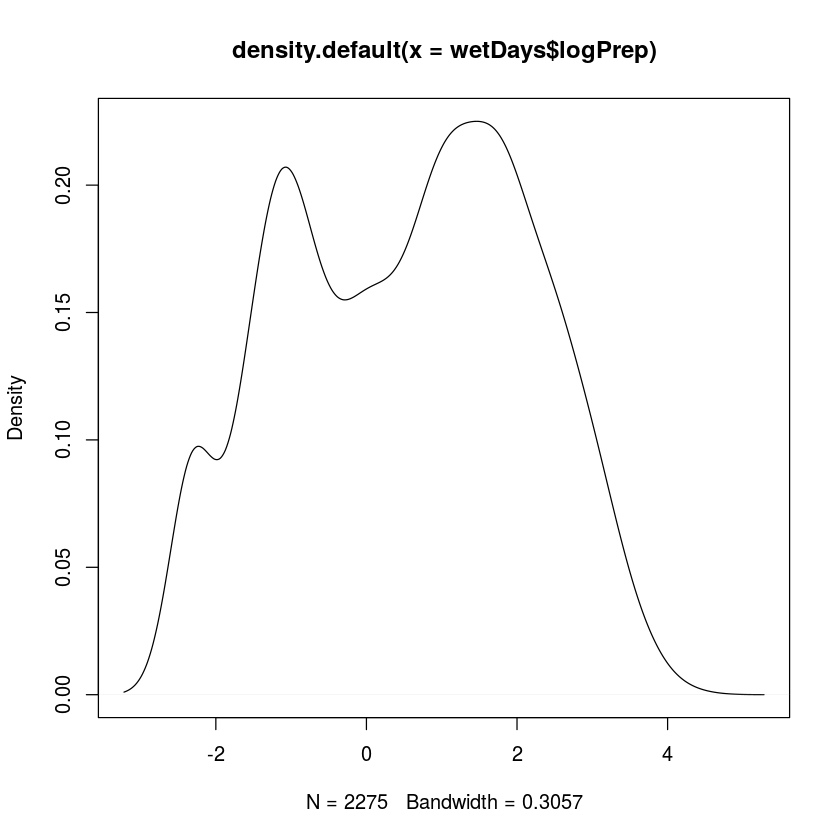

In [55]:
plot(density(wetDays$logPrep))